<a href="https://colab.research.google.com/github/RajkumarGalaxy/StructuredData/blob/master/ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANOVA using Python

In [30]:
# import libraries
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt
import seaborn as sns

np.random.seed(1)

In [31]:
method_1 = np.random.normal(10,3,10)
method_2 = np.random.normal(11,3,10)
method_3 = np.random.normal(12,3,10)
method_4 = np.random.normal(13,3,10)

data = pd.DataFrame({'method_1':method_1, 
                     'method_2':method_2, 
                     'method_3':method_3,
                     'method_4':method_4})
data.head()

,method_1,method_2,method_3,method_4
0,14.873036,15.386324,8.698142,10.925018
1,8.164731,4.819578,15.434171,11.809739
2,8.415485,10.032748,14.704772,10.938482
3,6.781094,9.847837,13.507483,10.464383
4,12.596223,14.401308,14.702568,10.986262


In [32]:
df = pd.melt(data,  
             value_vars=['method_1', 'method_2', 'method_3', 'method_4'])

df.columns = [ 'treatment', 'value']
df.sample(10)

,treatment,value
29,method_3,13.591066
14,method_2,14.401308
35,method_4,12.962006
5,method_1,3.095384
19,method_2,12.748446
10,method_2,15.386324
22,method_3,14.704772
15,method_2,7.700326
37,method_4,13.703247
16,method_2,10.482715


In [33]:
model = ols('value~C(treatment)', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1.975
Date:                Mon, 19 Apr 2021   Prob (F-statistic):              0.135
Time:                        15:06:49   Log-Likelihood:                -99.014
No. Observations:                  40   AIC:                             206.0
Df Residuals:                      36   BIC:                             212.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.7086      0.959     10.127      0.000       7.764      11.653
C(treatment)[T.method_2]     0.7827      1.356      0.577      0.567      -1.967       3.532
C(treatment)[T.method_3]     2.5522      1.356      1.882      0.068      -0.197       5.302
C(treatment)[T.method_4]     2.7557      1.356      2.033      0.050       0.006       5.505
==============================================================================
Omnibus:                        0.137   Durbin-Watson:                   2.527
Prob(Omnibus):                  0.934   Jarque-Bera (JB):                0.304
Skew:                           0.112   Prob(JB):                        0.859
Kurtosis:                       2.636   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
anova = sm.stats.anova_lm(model, typ=1)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),3.0,54.463487,18.154496,1.975314,0.135079
Residual,36.0,330.864727,9.190687,NaN,NaN


In [35]:
scipy.stats.f(3,36).ppf(0.95)

2.86626555094018

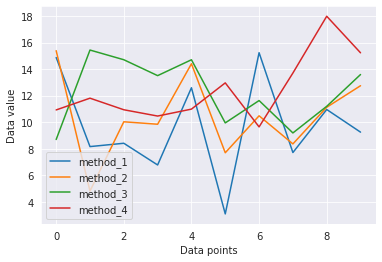

In [36]:
sns.set_style('darkgrid')
data.plot()
plt.xlabel('Data points')
plt.ylabel('Data value')
plt.show()

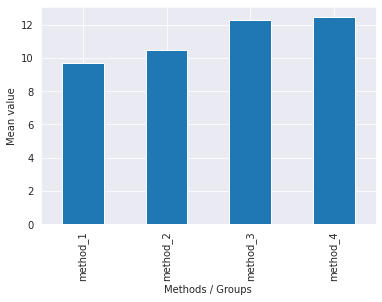

In [39]:
data.mean(axis=0).plot(kind='bar')
plt.xlabel('Methods / Groups')
plt.ylabel('Mean value')
plt.show()

# Limitation of ANOVA

In [99]:
# Alter the mean value of method_4
method_1 = np.random.normal(10,3,10)
method_2 = np.random.normal(11,3,10)
method_3 = np.random.normal(12,3,10)
method_4 = np.random.normal(15,3,10)

data = pd.DataFrame({'method_1':method_1, 
                     'method_2':method_2, 
                     'method_3':method_3,
                     'method_4':method_4})
data.head()

,method_1,method_2,method_3,method_4
0,4.785227,10.940308,12.627448,20.751956
1,8.291335,9.442751,8.315298,16.827573
2,14.736101,19.119110,11.035258,14.239155
3,10.755414,15.702209,12.823587,14.997808
4,10.493163,12.282129,11.497821,15.221823


In [100]:
df = pd.melt(data,  
             value_vars=['method_1', 'method_2', 'method_3', 'method_4'])

df.columns = [ 'treatment', 'value']
df.sample(10)

,treatment,value
5,method_1,10.738447
17,method_2,9.611515
6,method_1,6.273591
22,method_3,11.035258
11,method_2,9.442751
12,method_2,19.119110
39,method_4,17.520717
0,method_1,4.785227
28,method_3,12.943391
1,method_1,8.291335


In [101]:
model = ols('value~C(treatment)', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     9.257
Date:                Mon, 19 Apr 2021   Prob (F-statistic):           0.000113
Time:                        16:31:29   Log-Likelihood:                -99.728
No. Observations:                  40   AIC:                             207.5
Df Residuals:                      36   BIC:                             214.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.0071      0.976     10.254      0.000       8.028      11.986
C(treatment)[T.method_2]     0.8919      1.380      0.646      0.522      -1.907       3.691
C(treatment)[T.method_3]     2.6441      1.380      1.916      0.063      -0.155       5.443
C(treatment)[T.method_4]     6.6961      1.380      4.852      0.000       3.897       9.495
==============================================================================
Omnibus:                        2.562   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                1.480
Skew:                           0.298   Prob(JB):                        0.477
Kurtosis:                       3.730   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
anova = sm.stats.anova_lm(model, typ=1)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(treatment),3.0,264.506534,88.168845,9.257042,0.000113
Residual,36.0,342.882577,9.524516,NaN,NaN


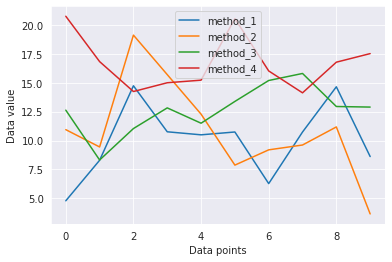

In [103]:
sns.set_style('darkgrid')
data.plot()
plt.xlabel('Data points')
plt.ylabel('Data value')
plt.show()

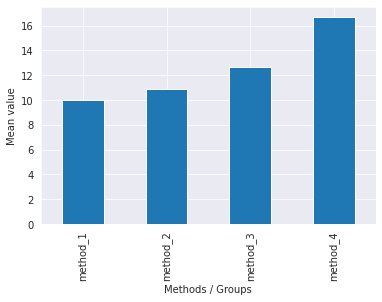

In [104]:
data.mean(axis=0).plot(kind='bar')
plt.xlabel('Methods / Groups')
plt.ylabel('Mean value')
plt.show()

# Post Hoc Analysis

In [105]:
from statsmodels.stats.multicomp import MultiComparison

comparison = MultiComparison(df['value'], df['treatment'])
tukey = comparison.tukeyhsd(0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
method_1,method_2,0.8919,0.9,-2.8253,4.609,False
method_1,method_3,2.6441,0.2396,-1.0731,6.3613,False
method_1,method_4,6.6961,0.001,2.9789,10.4133,True
method_2,method_3,1.7523,0.5788,-1.9649,5.4694,False
method_2,method_4,5.8042,0.001,2.0871,9.5214,True
method_3,method_4,4.052,0.0282,0.3348,7.7692,True


### Thank You for your time!